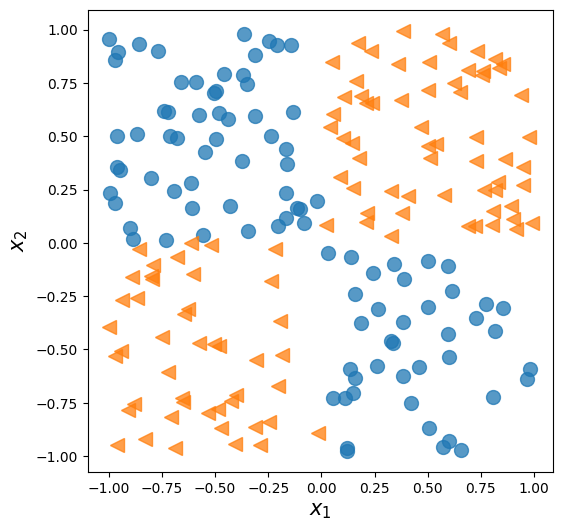

In [ ]:
# week6_1.txt
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(1)
np.random.seed(1)

model_logistic = tf.keras.Sequential()
model_logistic.add(tf.keras.layers.Dense(1, input_shape=(2,), kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='sigmoid'))
model_logistic.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_logistic.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy, metrics=[tf.keras.metrics.BinaryAccuracy])

In [ ]:
hist = model_logistic.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size=2, verbose=1)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - binary_accuracy: 0.4721 - loss: 0.7033 - val_binary_accuracy: 0.5200 - val_loss: 0.6998
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - binary_accuracy: 0.4977 - loss: 0.7017 - val_binary_accuracy: 0.5300 - val_loss: 0.6983
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - binary_accuracy: 0.5165 - loss: 0.7002 - val_binary_accuracy: 0.5400 - val_loss: 0.6969
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.5282 - loss: 0.6989 - val_binary_accuracy: 0.5500 - val_loss: 0.6956
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - binary_accuracy: 0.5658 - loss: 0.6976 - val_binary_accuracy: 0.5800 - val_loss: 0.6945
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.5461 - loss: 0.6964 - val_binary_accuracy: 0.5600 - val_loss: 0.6934
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - binary_accuracy: 0.5110 - loss: 0.6953 - val_binary_accuracy: 0.5400 - val_loss: 0.6924
Epoch 8

In [ ]:
history = hist.history

In [ ]:
print(type(history))
print(history.keys())

<class 'dict'>
dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])


In [ ]:
print(len(history['loss']))

200


In [ ]:
!pip install mlxtend

<ipython-input-9-410f9f49038c>:20: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step


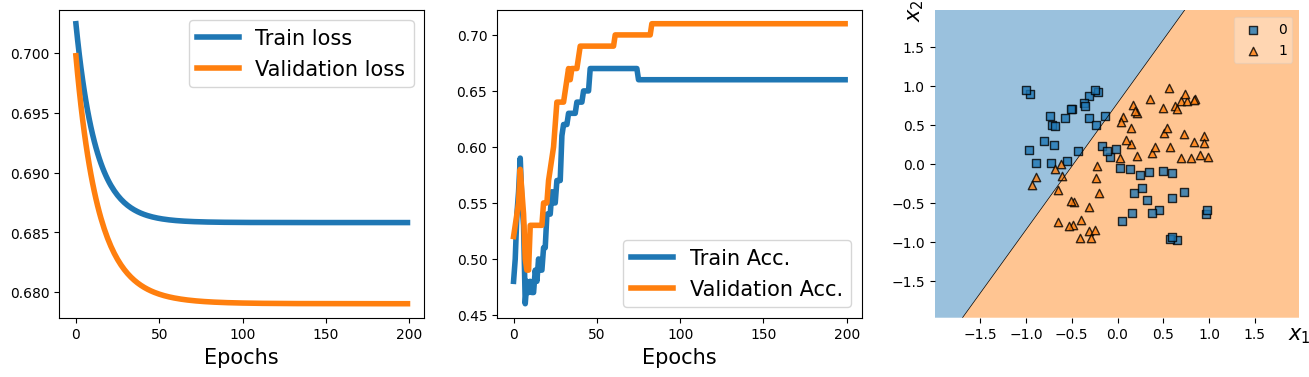

In [ ]:
# week6_2.txt
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_logistic)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

plt.show()

In [ ]:
tf.random.set_seed(1)

model_mlp = tf.keras.Sequential()
model_mlp.add(tf.keras.layers.Dense(4, input_shape=(2,), activation='relu'))
model_mlp.add(tf.keras.layers.Dense(4, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(4, activation='relu'))
model_mlp.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_mlp.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_mlp.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy, metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model_mlp.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size=2, verbose=1)

history = hist.history

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - binary_accuracy: 0.3532 - loss: 0.7003 - val_binary_accuracy: 0.4800 - val_loss: 0.6967
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - binary_accuracy: 0.5011 - loss: 0.6961 - val_binary_accuracy: 0.5300 - val_loss: 0.6933
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - binary_accuracy: 0.5248 - loss: 0.6943 - val_binary_accuracy: 0.5300 - val_loss: 0.6919
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - binary_accuracy: 0.5248 - loss: 0.6935 - val_binary_accuracy: 0.5300 - val_loss: 0.6911
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - binary_accuracy: 0.5248 - loss: 0.6929 - val_binary_accuracy: 0.5300 - val_loss: 0.6905
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - binary_accuracy: 0.5248 - loss: 0.6925 - val_binary_accuracy: 0.5300 - val_loss: 0.6900
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.5248 - loss: 0.6921 - val_binary_accuracy: 0.5300 - val_loss: 0.6895
Epoch 8/

  129/20000 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step

<ipython-input-12-68f61dafb654>:16: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step


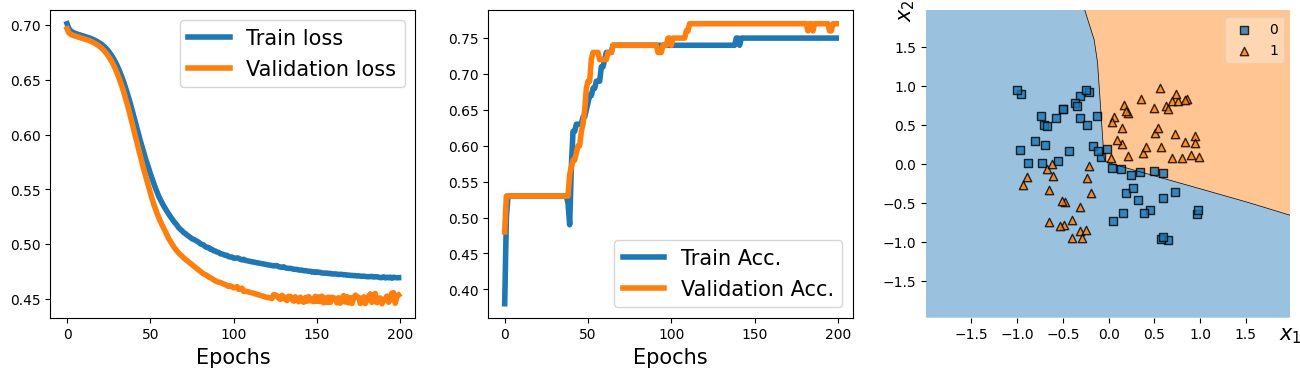

In [ ]:
# week6_3.txt
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_mlp)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_3.png', dpi=300)
plt.show()

In [ ]:
tf.random.set_seed(1)

inputs = tf.keras.Input(shape=(2,))

h1 = tf.keras.layers.Dense(4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(4, activation='relu')(h2)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h3)

model_mlp2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model_mlp2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_mlp2.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy, metrics=[tf.keras.metrics.BinaryAccuracy()])

In [ ]:
hist = model_mlp2.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size=2, verbose=1)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.4728 - loss: 0.6990 - val_binary_accuracy: 0.5300 - val_loss: 0.6976
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - binary_accuracy: 0.5248 - loss: 0.6979 - val_binary_accuracy: 0.5300 - val_loss: 0.6968
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - binary_accuracy: 0.5248 - loss: 0.6972 - val_binary_accuracy: 0.5300 - val_loss: 0.6962
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5248 - loss: 0.6966 - val_binary_accuracy: 0.5300 - val_loss: 0.6957
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.5248 - loss: 0.6960 - val_binary_accuracy: 0.5300 - val_loss: 0.6953
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - binary_accuracy: 0.5248 - loss: 0.6956 - val_binary_accuracy: 0.5300 - val_loss: 0.6949
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.5248 - loss: 0.6952 - val_binary_accuracy: 0.5300 - val_loss: 0.6946
Epoch 8/200

<ipython-input-16-4427922e84a9>:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step


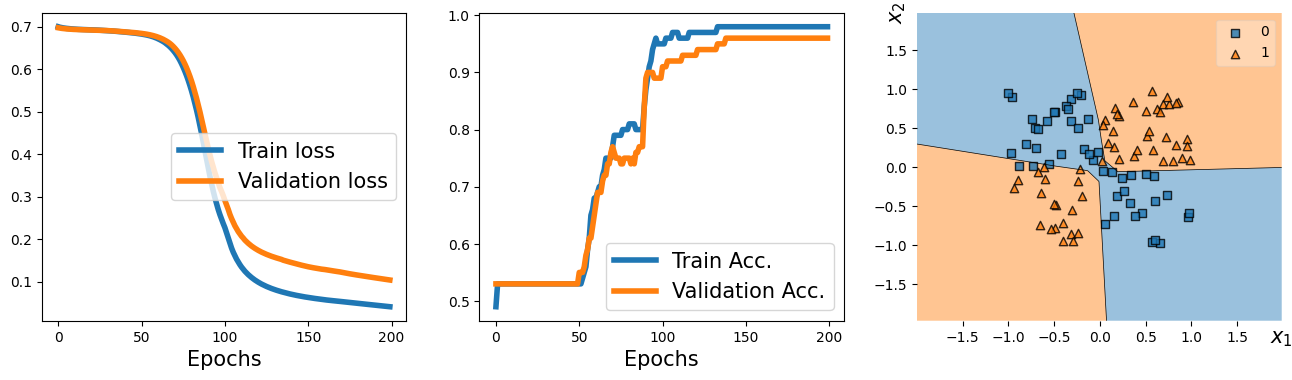

In [ ]:
# week6_4.txt
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_mlp2)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
class Mymodel(tf.keras.Model):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

In [ ]:
tf.random.set_seed(1)

model_mlp3 = Mymodel()

model_mlp3.build(input_shape=(None, 2))
model_mlp3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'mymodel_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Model: "mymodel_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_mlp3.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy, metrics=[tf.keras.metrics.BinaryAccuracy()])

model_mlp3.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size=2, verbose=1)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - binary_accuracy: 0.3173 - loss: 0.7805 - val_binary_accuracy: 0.2600 - val_loss: 0.7138
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.3136 - loss: 0.7146 - val_binary_accuracy: 0.5300 - val_loss: 0.6802
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - binary_accuracy: 0.5059 - loss: 0.6858 - val_binary_accuracy: 0.5300 - val_loss: 0.6729
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - binary_accuracy: 0.5248 - loss: 0.6750 - val_binary_accuracy: 0.5300 - val_loss: 0.6670
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.5248 - loss: 0.6671 - val_binary_accuracy: 0.5300 - val_loss: 0.6601
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.5248 - loss: 0.6598 - val_binary_accuracy: 0.5300 - val_loss: 0.6533
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.5376 - loss: 0.6527 - val_binary_accuracy: 0.5900 - val_loss: 0.6462
Epoch 8/2

    1/20000 ━━━━━━━━━━━━━━━━━━━━ 25:40 77ms/step

<ipython-input-23-03f026c0fcdf>:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step


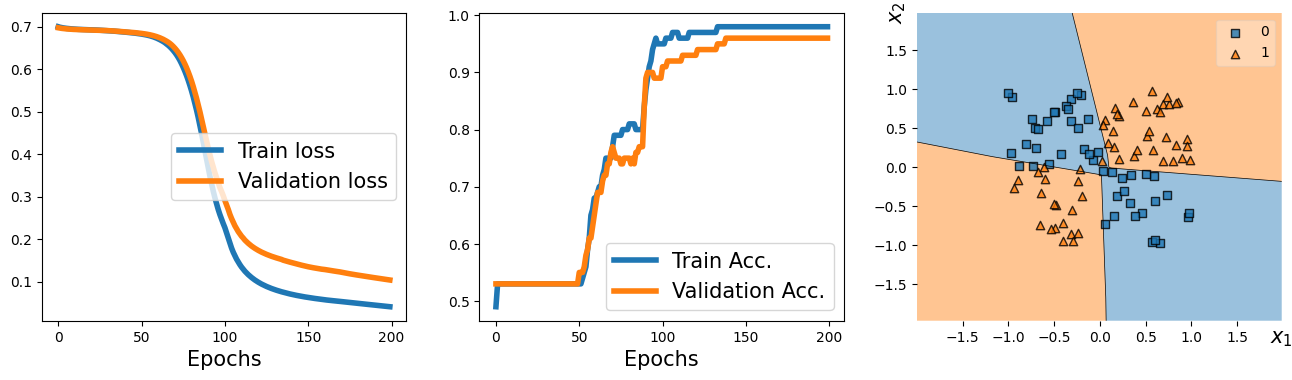

In [ ]:
# week6_5.txt
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_mlp3)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [ ]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, training=False):
        if training:
          batch = tf.shape(inputs)[0]
          dim = tf.shape(inputs)[1]
          noise = tf.random.normal(shape=(batch, dim), mean=0.0, stddev=self.noise_stddev)
          noisy_inputs = tf.add(inputs, noise)
        else:
          noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)

    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim' : self.output_dim,
                       'noise_stddev':self.noise_stddev})
        return config

In [ ]:
tf.random.set_seed(1)

noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

config = noisy_layer.get_config()

new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.0057025943 0.00623897696 0]]
[[0 0.00441041775 0 0.0069267638]]


In [ ]:
tf.random.set_seed(1)

model_noisylinear = tf.keras.Sequential([
  NoisyLinear(4, noise_stddev=0.1),
  tf.keras.layers.Dense(units=4, activation='relu'),
  tf.keras.layers.Dense(units=4, activation='relu'),
  tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

model_noisylinear.build(input_shape=(None, 2))
model_noisylinear.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ noisy_linear_2 (NoisyLinear)         │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57 (228.00 B)

 Trainable params: 57 (228.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_noisylinear.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.BinaryCrossentropy, metrics=[tf.keras.metrics.BinaryAccuracy()])

hist = model_noisylinear.fit(x_train, y_train, epochs=200, validation_data=(x_valid, y_valid), batch_size=2, verbose=1)

Epoch 1/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.4699 - loss: 0.6920 - val_binary_accuracy: 0.7100 - val_loss: 0.6896
Epoch 2/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - binary_accuracy: 0.6709 - loss: 0.6895 - val_binary_accuracy: 0.6900 - val_loss: 0.6878
Epoch 3/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.6961 - loss: 0.6884 - val_binary_accuracy: 0.7400 - val_loss: 0.6865
Epoch 4/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.7307 - loss: 0.6874 - val_binary_accuracy: 0.7400 - val_loss: 0.6854
Epoch 5/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.7183 - loss: 0.6863 - val_binary_accuracy: 0.7300 - val_loss: 0.6844
Epoch 6/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.7166 - loss: 0.6857 - val_binary_accuracy: 0.7100 - val_loss: 0.6833
Epoch 7/200
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.7408 - loss: 0.6838 - val_binary_accuracy: 0.7300 - val_loss: 0.6821
Epoch 8/20

    1/20000 ━━━━━━━━━━━━━━━━━━━━ 32:25 97ms/step

<ipython-input-30-d1895096cb18>:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step


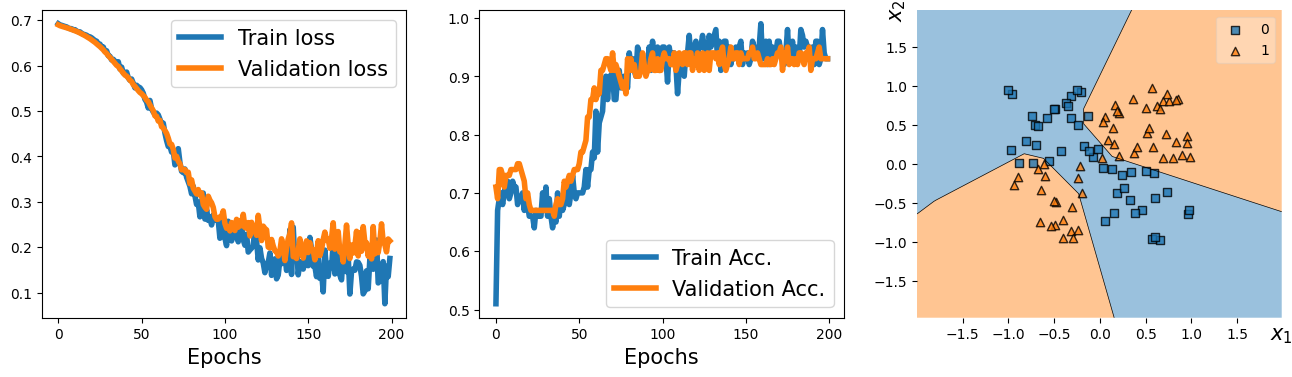

In [ ]:
# week6_6.txt
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model_noisylinear)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_4.png', dpi=300)
plt.show()